In [ ]:
import pandas as pd

# Load the CSVs
df_haushalt_raw = pd.read_csv("in/61243-0001_de_flat_strompreise_haushalte.csv", delimiter=';', encoding='utf-8')
df_industrie_raw = pd.read_csv("in/61243-0005_de_flat_strompreise_nichthaushalte.csv", delimiter=';', encoding='utf-8')
# Relevante Spalten extrahieren und umbenennen zur besseren Übersicht
# Nur relevante Spalten extrahieren (mit *_attribute_label, wo der Inhalt steckt)
df_haushalte_clean = df_haushalt_raw[[
    "time",  # Jahr
    "1_variable_attribute_label",  # Halbjahr
    "2_variable_attribute_label",  # Gebiet (z. B. Deutschland)
    "3_variable_attribute_label",  # Preisart
    "4_variable_attribute_label",  # Verbrauchsklasse
    "value"  # Preiswert als String mit Komma
]]

# Spalten sinnvoll benennen
df_haushalte_clean.columns = [
    "Jahr", "Halbjahr", "Gebiet", "Preisart", "Verbrauchsklasse", "Preis_EUR_kWh"
]

# Preiswerte umwandeln: Komma → Punkt
df_haushalte_clean["Preis_EUR_kWh"] = df_haushalte_clean["Preis_EUR_kWh"].str.replace(",", ".", regex=False)
df_haushalte_clean["Preis_EUR_kWh"] = pd.to_numeric(df_haushalte_clean["Preis_EUR_kWh"], errors="coerce")

# Nur gültige Werte (keine NaNs)
df_haushalte_clean = df_haushalte_clean.dropna(subset=["Preis_EUR_kWh"])

# Nur relevante Preisarten filtern
relevante_preisarten = [
    "Durchschnittspreise ohne Steuern, Abgaben, Umlagen",
    "Durchschnittspreise ohne Umsatzsteuer u.a. abz.St.",
    "Durchschnittspreise inkl.Steuern, Abgaben, Umlagen"
]
df_haushalte_clean = df_haushalte_clean[df_haushalte_clean["Preisart"].isin(relevante_preisarten)]

# In Wide-Format umwandeln
df_haushalte_wide = df_haushalte_clean.pivot_table(
    index=["Jahr", "Halbjahr", "Gebiet", "Verbrauchsklasse"],
    columns="Preisart",
    values="Preis_EUR_kWh"
).reset_index()

# Spaltennamen bereinigen
df_haushalte_wide.columns.name = None
df_haushalte_wide.rename(columns={
    "Durchschnittspreise ohne Steuern, Abgaben, Umlagen": "Netto_ohne_Abgaben",
    "Durchschnittspreise ohne Umsatzsteuer u.a. abz.St.": "Netto_ohne_USt",
    "Durchschnittspreise inkl.Steuern, Abgaben, Umlagen": "Brutto"
}, inplace=True)
# Relevante Spalten aus dem Industrie-Datensatz extrahieren
df_industrie_cleaned = df_industrie_raw[[  
    "time",  # Jahr
    "1_variable_attribute_label",  # Halbjahr
    "2_variable_attribute_label",  # Gebiet (z. B. Deutschland)
    "3_variable_attribute_label",  # Preisart
    "4_variable_attribute_label",  # Verbrauchsklasse
    "value"  # Preiswert als String mit Komma
]]

# Spalten umbenennen
df_industrie_cleaned.columns = [
    "Jahr", "Halbjahr", "Gebiet", "Preisart", "Verbrauchsklasse", "Preis_EUR_kWh"
]

# Preiswert umwandeln: Komma → Punkt → Float
df_industrie_cleaned["Preis_EUR_kWh"] = df_industrie_cleaned["Preis_EUR_kWh"].str.replace(",", ".", regex=False)
df_industrie_cleaned["Preis_EUR_kWh"] = pd.to_numeric(df_industrie_cleaned["Preis_EUR_kWh"], errors="coerce")
df_industrie_cleaned = df_industrie_cleaned.dropna(subset=["Preis_EUR_kWh"])

# Nur relevante Preisarten behalten
df_industrie_cleaned = df_industrie_cleaned[df_industrie_cleaned["Preisart"].isin(relevante_preisarten)]

# In Wide-Format bringen
df_industrie_wide = df_industrie_cleaned.pivot_table(
    index=["Jahr", "Halbjahr", "Gebiet", "Verbrauchsklasse"],
    columns="Preisart",
    values="Preis_EUR_kWh"
).reset_index()

# Spaltennamen bereinigen und umbenennen
df_industrie_wide.columns.name = None
df_industrie_wide.rename(columns={
    "Durchschnittspreise ohne Steuern, Abgaben, Umlagen": "Netto_ohne_Abgaben",
    "Durchschnittspreise ohne Umsatzsteuer u.a. abz.St.": "Netto_ohne_USt",
    "Durchschnittspreise inkl.Steuern, Abgaben, Umlagen": "Brutto"
}, inplace=True)

df_industrie_wide

# def extract_relevant_data(df, konsum_typ):
#     df = df.copy()
#     df["value"] = df["value"].str.replace(",", ".", regex=False)
#     df["value"] = pd.to_numeric(df["value"], errors="coerce")

#     # Select relevant columns and make a true copy
#     df_reduced = df[[
#         "time",
#         "1_variable_attribute_label",
#         "4_variable_attribute_label",
#         "value",
#         "value_unit",
#         "value_q"
#     ]].copy()  # This ensures no chained assignment issues

#     # Rename columns
#     df_reduced = df_reduced.rename(columns={
#         "time": "Jahr",
#         "1_variable_attribute_label": "Halbjahr",
#         "4_variable_attribute_label": "Verbrauchsklasse",
#         "value": "Preis_EUR_kWh",
#         "value_unit": "Einheit",
#         "value_q": "Qualität"
#     })

#     # Add type column
#     df_reduced["Typ"] = konsum_typ

#     return df_reduced


# # Create final DataFrames
# df_strompreise_haushalte = extract_relevant_data(df_haushalt_raw, "Haushalt")
# df_strompreise_industrie = extract_relevant_data(df_industrie_raw, "Industrie")


# df_strompreise_haushalte[df_strompreise_haushalte["Jahr"] == 2019]

df_haushalte_wide

C:\Users\sulta\AppData\Local\Temp\ipykernel_36608\1223126584.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_haushalte_clean["Preis_EUR_kWh"] = df_haushalte_clean["Preis_EUR_kWh"].str.replace(",", ".", regex=False)
C:\Users\sulta\AppData\Local\Temp\ipykernel_36608\1223126584.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_haushalte_clean["Preis_EUR_kWh"] = pd.to_numeric(df_haushalte_clean["Preis_EUR_kWh"], errors="coerce")
C:\Users\sulta\AppData\Local\Temp\ipykernel_36608\1223126584.py:67: S

,Jahr,Halbjahr,Gebiet,Verbrauchsklasse,Brutto,Netto_ohne_Abgaben,Netto_ohne_USt
0,2019,2. Halbjahr,Deutschland,1 000 bis unter 2 500 KWh,0.3244,0.1621,0.2726
1,2019,2. Halbjahr,Deutschland,15 000 KWh und mehr,0.2370,0.0936,0.1992
2,2019,2. Halbjahr,Deutschland,2 500 bis unter 5 000 KWh,0.2878,0.1321,0.2418
3,2019,2. Halbjahr,Deutschland,5 000 bis unter 15 000 KWh,0.2644,0.1139,0.2222
4,2019,2. Halbjahr,Deutschland,Insgesamt,0.2992,0.1421,0.2514
...,...,...,...,...,...,...,...
61,2024,2. Halbjahr,Deutschland,15 000 KWh und mehr,0.3370,0.2343,0.2833
62,2024,2. Halbjahr,Deutschland,2 500 bis unter 5 000 KWh,0.3943,0.2797,0.3314
63,2024,2. Halbjahr,Deutschland,5 000 bis unter 15 000 KWh,0.3614,0.2547,0.3038
64,2024,2. Halbjahr,Deutschland,Insgesamt,0.4120,0.2946,0.3463


In [49]:

df_preise_haushalte = df_haushalte_wide[df_haushalte_wide["Verbrauchsklasse"] == "Insgesamt"]
df_preise_industrie = df_industrie_wide[df_industrie_wide["Verbrauchsklasse"] == "Insgesamt"]


# df_filtered = df_filtered.groupby(["Jahr"]).mean().reset_index()

# print(df_preise_haushalte)

df_preise_haushalte = (
    df_preise_haushalte
    .groupby("Jahr")[["Brutto", "Netto_ohne_Abgaben", "Netto_ohne_USt"]]
    .mean()
    .reset_index()
    .sort_values("Jahr")
)

df_preise_industrie = (
    df_preise_industrie
    .groupby("Jahr")[["Brutto", "Netto_ohne_Abgaben", "Netto_ohne_USt"]]
    .mean()
    .reset_index()
    .sort_values("Jahr")
)

# df_preise_haushalte
print(df_preise_haushalte)
print(df_preise_industrie)




   Jahr   Brutto  Netto_ohne_Abgaben  Netto_ohne_USt
0  2019  0.29920             0.14210         0.25140
1  2020  0.31550             0.15515         0.26885
2  2021  0.32745             0.16350         0.27520
3  2022  0.34230             0.22075         0.28770
4  2023  0.42020             0.30410         0.35315
5  2024  0.41110             0.29405         0.34555
   Jahr   Brutto  Netto_ohne_Abgaben  Netto_ohne_USt
0  2019  0.17560             0.06440         0.13730
1  2020  0.18675             0.07355         0.14985
2  2021  0.19940             0.08605         0.15775
3  2022  0.25255             0.16560         0.20285
4  2023  0.25625             0.18025         0.20530
5  2024  0.24905             0.17615         0.20140


In [51]:
# Haushalte: melt auf lange Form
df_haushalt_melted = df_preise_haushalte.melt(
    id_vars="Jahr",
    value_vars=["Brutto", "Netto_ohne_Abgaben", "Netto_ohne_USt"],
    var_name="Preisart",
    value_name="Preis_EUR_kWh"
)
df_haushalt_melted["Typ"] = "Haushalte"

# Industrie: melt auf lange Form
df_industrie_melted = df_preise_industrie.melt(
    id_vars="Jahr",
    value_vars=["Brutto", "Netto_ohne_Abgaben", "Netto_ohne_USt"],
    var_name="Preisart",
    value_name="Preis_EUR_kWh"
)
df_industrie_melted["Typ"] = "Industrie"

# Kombinieren
df_preise_prophet = pd.concat([df_haushalt_melted, df_industrie_melted], ignore_index=True)

# Prophet erwartet eine Datums-Spalte mit Name 'ds' und Zielspalte 'y'
df_preise_prophet["ds"] = pd.to_datetime(df_preise_prophet["Jahr"], format="%Y")
df_preise_prophet.rename(columns={"Preis_EUR_kWh": "y"}, inplace=True)

# Spaltenanordnung optimieren (optional)
df_preise_prophet = df_preise_prophet[["ds", "y", "Preisart", "Typ", "Jahr"]]

df_preise_prophet

,ds,y,Preisart,Typ,Jahr
0,2019-01-01,0.29920,Brutto,Haushalte,2019
1,2020-01-01,0.31550,Brutto,Haushalte,2020
2,2021-01-01,0.32745,Brutto,Haushalte,2021
3,2022-01-01,0.34230,Brutto,Haushalte,2022
4,2023-01-01,0.42020,Brutto,Haushalte,2023
5,2024-01-01,0.41110,Brutto,Haushalte,2024
6,2019-01-01,0.14210,Netto_ohne_Abgaben,Haushalte,2019
7,2020-01-01,0.15515,Netto_ohne_Abgaben,Haushalte,2020
8,2021-01-01,0.16350,Netto_ohne_Abgaben,Haushalte,2021
9,2022-01-01,0.22075,Netto_ohne_Abgaben,Haushalte,2022


In [53]:
from prophet import Prophet

# Zieljahre definieren
forecast_years = [2025, 2030, 2035, 2040, 2045, 2050]
future_df = pd.DataFrame({
    "ds": pd.to_datetime([f"{y}-01-01" for y in forecast_years])
})

# Ergebnisliste für alle Kombinationen
all_forecasts = []

# Jede Kombination aus Preisart und Typ einzeln vorhersagen
for (preisart, typ), group in df_preise_prophet.groupby(["Preisart", "Typ"]):
    model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
    model.fit(group[["ds", "y"]])
    
    forecast = model.predict(future_df.copy())
    forecast_result = forecast[["ds", "yhat"]].copy()
    forecast_result["Preisart"] = preisart
    forecast_result["Typ"] = typ
    forecast_result["Jahr"] = forecast_result["ds"].dt.year
    
    all_forecasts.append(forecast_result)

# Alle Prognosen zusammenführen
df_prophet_forecast = pd.concat(all_forecasts, ignore_index=True)

# Übersichtlicher machen
df_prophet_forecast = df_prophet_forecast[["Jahr", "Typ", "Preisart", "yhat"]]
df_prophet_forecast.rename(columns={"yhat": "Prognose_EUR_kWh"}, inplace=True)
df_prophet_forecast = df_prophet_forecast.sort_values(["Preisart", "Typ", "Jahr"])




13:54:57 - cmdstanpy - INFO - Chain [1] start processing
13:54:57 - cmdstanpy - INFO - Chain [1] done processing
13:54:57 - cmdstanpy - INFO - Chain [1] start processing
13:54:57 - cmdstanpy - INFO - Chain [1] done processing
13:54:58 - cmdstanpy - INFO - Chain [1] start processing
13:54:58 - cmdstanpy - INFO - Chain [1] done processing
13:54:58 - cmdstanpy - INFO - Chain [1] start processing
13:54:58 - cmdstanpy - INFO - Chain [1] done processing
13:54:58 - cmdstanpy - INFO - Chain [1] start processing
13:54:58 - cmdstanpy - INFO - Chain [1] done processing
13:54:58 - cmdstanpy - INFO - Chain [1] start processing
13:54:58 - cmdstanpy - INFO - Chain [1] done processing


In [61]:

# df_prophet_forecast

# Historische Daten vorbereiten
df_hist_plot = df_preise_prophet.copy()
df_hist_plot = df_hist_plot[["Jahr", "Typ", "Preisart", "y"]].copy()
df_hist_plot.rename(columns={"y": "Preis_EUR_kWh"}, inplace=True)
df_hist_plot["Quelle"] = "Historisch"

# Prognosedaten vorbereiten
df_forecast_plot = df_prophet_forecast.copy()
df_forecast_plot = df_forecast_plot[["Jahr", "Typ", "Preisart", "Prognose_EUR_kWh"]].copy()
df_forecast_plot.rename(columns={"Prognose_EUR_kWh": "Preis_EUR_kWh"}, inplace=True)
df_forecast_plot["Quelle"] = "Prognose"

# Kombinieren
df_plot = pd.concat([df_hist_plot, df_forecast_plot], ignore_index=True)
df_plot = df_plot.sort_values(["Preisart", "Typ", "Jahr"]).reset_index(drop=True)


df_plot



,Jahr,Typ,Preisart,Preis_EUR_kWh,Quelle
0,2019,Haushalte,Brutto,0.299200,Historisch
1,2020,Haushalte,Brutto,0.315500,Historisch
2,2021,Haushalte,Brutto,0.327450,Historisch
3,2022,Haushalte,Brutto,0.342300,Historisch
4,2023,Haushalte,Brutto,0.420200,Historisch
...,...,...,...,...,...
67,2030,Industrie,Netto_ohne_USt,0.304923,Prognose
68,2035,Industrie,Netto_ohne_USt,0.380894,Prognose
69,2040,Industrie,Netto_ohne_USt,0.456866,Prognose
70,2045,Industrie,Netto_ohne_USt,0.532880,Prognose


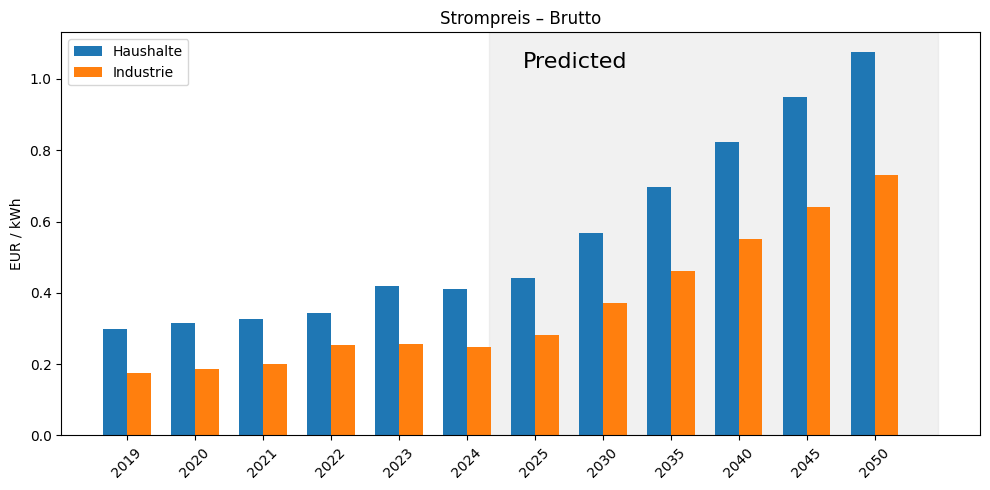

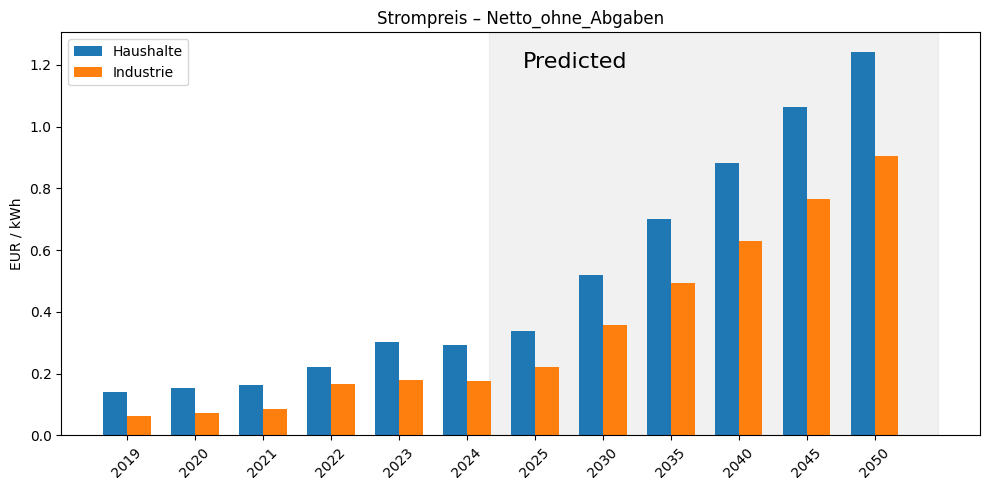

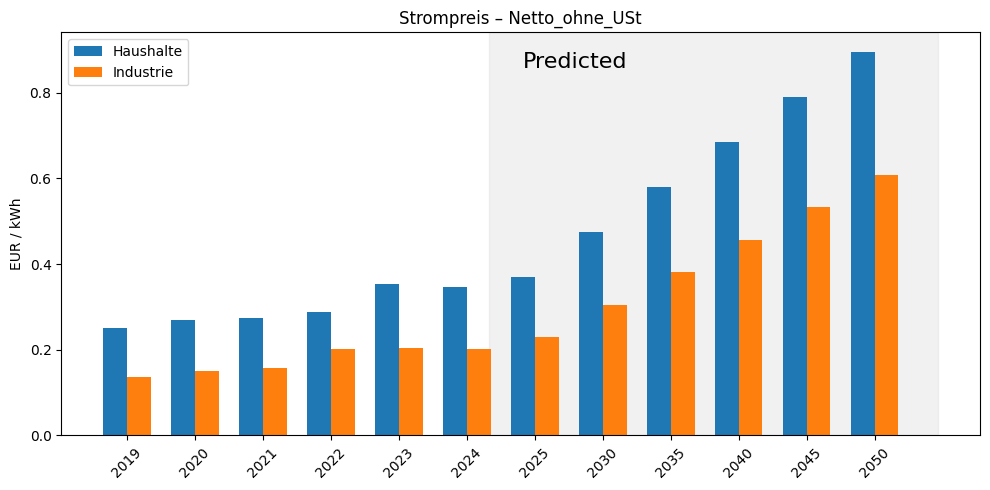

In [63]:
import matplotlib.pyplot as plt


def shade_forecast_area(ax, forecast_start_year=2025, color='lightgray', alpha=0.3, label="Predicted"):
    """
    Shade the forecast area starting from forecast_start_year on a bar plot.
    
    Parameters:
    - ax: matplotlib Axes object
    - forecast_start_year: int, first year of forecast
    - color: background color
    - alpha: transparency
    - label: optional text label to display
    """

    bar_centers = []
    seen_x_positions = set()

    for patch in ax.patches:
        try:
            x = patch.get_x()
            width = patch.get_width()
            x_center = x + width / 2

            if x_center not in seen_x_positions:
                bar_centers.append(x_center)
                seen_x_positions.add(x_center)
        except AttributeError:
            # ignore polygons without get_x()
            continue

    # Map bar_centers to years
    try:
        bar_years = [int(label.get_text()) for label in ax.get_xticklabels()]
    except:
        bar_years = list(range(len(bar_centers)))

    year_to_center = dict(zip(bar_years, bar_centers))

    if forecast_start_year in year_to_center:
        start_forecast = year_to_center[forecast_start_year] - 0.5
        ax.axvspan(
            start_forecast, ax.get_xlim()[1],
            color=color, alpha=alpha, zorder=0
        )

        if label:
            ax.text(
                start_forecast + 0.5,
                ax.get_ylim()[1] * 0.95,
                label,
                verticalalignment='top',
                horizontalalignment='left',
                fontsize=16,
                color='black'
            )

            


# Farben für Haushalt & Industrie
farben = {
    "Haushalte": "#1f77b4",  # blau
    "Industrie": "#ff7f0e",  # orange
}

# Alle Preisarten
preisarten = df_plot["Preisart"].unique()
bar_width = 0.35

for preisart in preisarten:
    fig, ax = plt.subplots(figsize=(10, 5))
    df_sub = df_plot[df_plot["Preisart"] == preisart]

    jahre = sorted(df_sub["Jahr"].unique())
    x = list(range(len(jahre)))

    for j, typ in enumerate(["Haushalte", "Industrie"]):
        df_typ = df_sub[df_sub["Typ"] == typ]
        df_typ = df_typ.set_index("Jahr").reindex(jahre)
        y = df_typ["Preis_EUR_kWh"].values

        # Versetzte Balken nebeneinander
        ax.bar(
            [xi + (j - 0.5) * bar_width for xi in x],
            y,
            width=bar_width,
            label=typ,
            color=farben[typ]
        )

    # Achsenbeschriftung & Ticks setzen
    ax.set_xticks(x)
    ax.set_xticklabels(jahre, rotation=45)

    # Forecast-Zone schattieren
    shade_forecast_area(ax, forecast_start_year=2025)

    ax.set_ylabel("EUR / kWh")
    ax.set_title(f"Strompreis – {preisart}")
    ax.legend()
    plt.tight_layout()
    plt.show()